# <span style="color:DarkRed"> Lesson 01 - Introduction to parameter estimation </span>

## Section 1.1 What is Bayesian statistics?

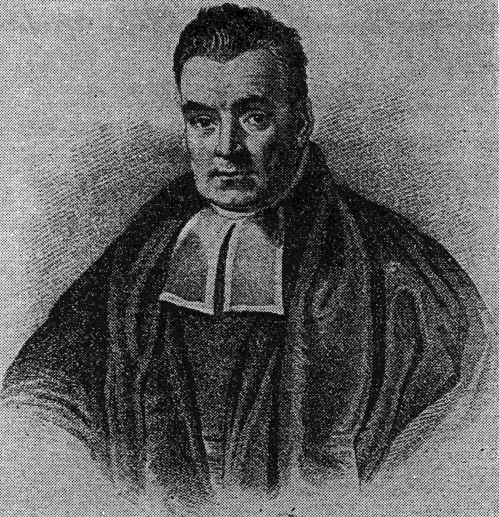

Reverend Thomas Bayes (1702-1761)

## Section 1.2 An example

### Example 1.2.1 - Body temperature of cats (1)

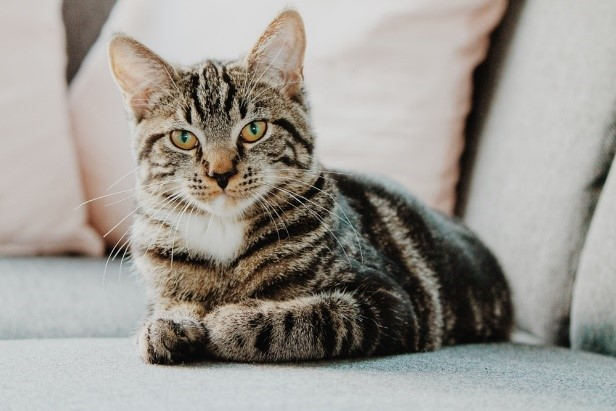

Suppose we measured the body temperature $y$ of $n=50$ healthy cats (in $^\circ$C). The results are as follows:

In [1]:
y = [39.54, 37.87, 39.02, 38.30, 38.03, 39.27, 38.68, 38.28, 38.39, 38.66,
       39.47, 38.57, 38.93, 38.56, 38.24, 38.91, 38.28, 38.78, 38.50, 38.07, 
       37.75, 38.68, 37.74, 38.78, 37.83, 39.09, 37.93, 37.92, 39.03, 38.92,
       38.72, 39.03, 38.52, 38.97, 38.42, 38.72, 38.77, 38.44, 38.14, 37.86, 
       38.27, 38.63, 38.35, 38.83, 38.10, 38.54, 38.55, 38.32, 39.56, 38.22]

We are interested in the "central tendency" of the data, i.e., "the" body temperature of healthy cats. There are several ways to display this dataset, e.g. via a *histogram*.

Make a histogram of the data. 

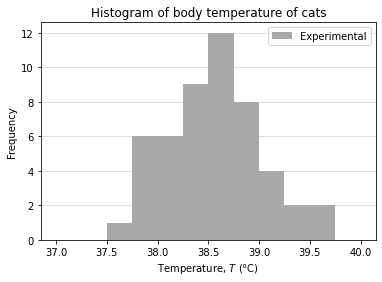

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(x=y, 
         bins=np.arange(37, 40.25, 0.25), 
         color='darkgrey',alpha=1, rwidth=1, label='Experimental')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Temperature, $T$ (\xb0C)')
plt.ylabel('Frequency')
plt.title('Histogram of body temperature of cats')
plt.legend(loc='best')
plt.show()

## Section 1.3 Intuition

### Example 1.3.1 - Body temperature of cats (1) - Intuition

For the sample of $n=50$ cats, we have:

In [3]:
y = [39.54, 37.87, 39.02, 38.30, 38.03, 39.27, 38.68, 38.28, 38.39, 38.66,
       39.47, 38.57, 38.93, 38.56, 38.24, 38.91, 38.28, 38.78, 38.50, 38.07, 
       37.75, 38.68, 37.74, 38.78, 37.83, 39.09, 37.93, 37.92, 39.03, 38.92,
       38.72, 39.03, 38.52, 38.97, 38.42, 38.72, 38.77, 38.44, 38.14, 37.86, 
       38.27, 38.63, 38.35, 38.83, 38.10, 38.54, 38.55, 38.32, 39.56, 38.22]

Based on "common knowledge" or "gut feelings", we infer that "the" body temperature of cats (i.e., the *central tendency* or *location*) can be well described by the *average* ${\bar y}$ of the sample.

**a.**   What is the average ${\bar y}$ of the dataset $y$?

In [4]:
import statistics as stat

mu = stat.mean(y)

print("mu = {:.2f} \xb0C".format(mu))

mu = 38.54 °C


or

In [5]:
import numpy as np

Y = np.array(y)
mu = Y.mean()

print("mu = {:.2f} \xb0C".format(mu))

mu = 38.54 °C


or

In [6]:
import numpy as np

Y = np.array(y)
mu = np.mean(Y)

print("mu = {:.2f} \xb0C".format(mu))

mu = 38.54 °C


**b.** Plot a vertical line in the histogram at the position of the average.

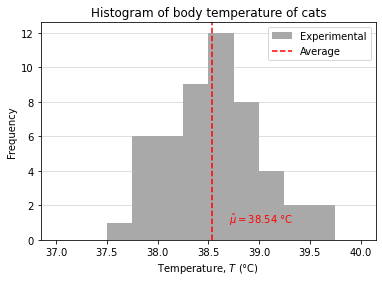

In [7]:
import matplotlib.pyplot as plt

plt.hist(x=y, 
         bins=np.arange(37, 40.25, 0.25), 
         color='darkgrey',alpha=1, rwidth=1, label='Experimental')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Temperature, $T$ (\xb0C)')
plt.ylabel('Frequency')
plt.title('Histogram of body temperature of cats')
# make a vertical line:
plt.axvline(x = mu, color = 'red', linestyle='--', label='Average')
plt.legend(loc='best')
plt.text(38.7, 1.2, '$\^\mu = ${:.2f} \xb0C'.format(mu), verticalalignment='center', color='red')
plt.show()

## Section 1.4 Method of Least Squares

### Example 1.4.1 - Body temperature of cats (2) - Least Squares

Suppose that we did measurements on the body temperature of only $n=3$ healthy cats:

In [61]:
import numpy as np

y = np.array([37.5,38.0,40.0])

**a.** What is for this dataset $y$ the Least Squares (LS) estimate of $\mu$, i.e., what is the average ${\bar y}$?

In [ ]:
mu_LS = 

**b.** Make a plot of the sum-of-squares function $SS_{\rm err}$ as a function of the parameter $\mu$ between 37 and 40 $^\circ$C, and add a vertical line at the LS estimate of $\mu$.

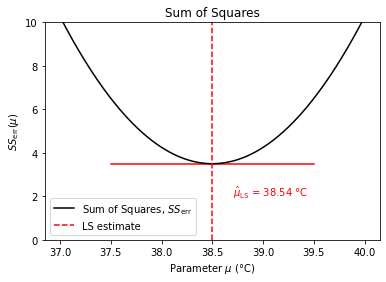

In [11]:
import matplotlib.pyplot as plt

# First, define the SS_err function:
def SS_err(mu, y):
    Y = np.array(y)
    return(np.sum(np.square(Y-mu)));

# make list of mu-values between 37 and 40 oC:
x = np.linspace(37, 40, 201)

# Evaluate the SS_err function for all mu-values:
SS = np.array([SS_err(xi, y) for xi in x])

SS_min = SS_err(mu_LS, y)   # Lowest value of SS.err
x_hor = np.array([mu_LS - 1.0, mu_LS + 1.0])
y_hor = np.repeat(SS_min, 2)

# Make a scatter plot:
plt.plot(x_hor, y_hor, 'r-')
plt.plot(x, SS, 'k', label='Sum of Squares, $SS_{{\\rm err}}$')
plt.title('Sum of Squares')
plt.xlabel('Parameter $\mu$ (\xb0C)')
plt.ylabel('$SS_{{\\rm err}}(\mu)$')
plt.axvline(x = mu_LS, color = 'red', linestyle='--', label='LS estimate')
plt.legend(loc='best')
plt.ylim([0, 10])
plt.text(38.7, 2.2, '$\hat{\mu}_{{\\rm LS}}$ = '+'{0:.2f} \xb0C'.format(mu), verticalalignment='center', color='red')
plt.show()

### Example 1.4.2 - Body temperature of cats (1) - Least Squares

For the sample of $n=50$ cats, we have:

In [12]:
import numpy as np

y = [39.54, 37.87, 39.02, 38.30, 38.03, 39.27, 38.68, 38.28, 38.39, 38.66,
       39.47, 38.57, 38.93, 38.56, 38.24, 38.91, 38.28, 38.78, 38.50, 38.07, 
       37.75, 38.68, 37.74, 38.78, 37.83, 39.09, 37.93, 37.92, 39.03, 38.92,
       38.72, 39.03, 38.52, 38.97, 38.42, 38.72, 38.77, 38.44, 38.14, 37.86, 
       38.27, 38.63, 38.35, 38.83, 38.10, 38.54, 38.55, 38.32, 39.56, 38.22]

**a.** What is for this dataset $y$ the Least Squares (LS) estimate of $\mu$, i.e., what is the average ${\bar y}$? 

**b.** Make a plot of the sum-of-squares function $SS_{{\rm err}}$ as a function of the parameter $\mu$ between 37 and 40 $^\circ$C, and add a vertical line at the LS estimate of $\mu$.

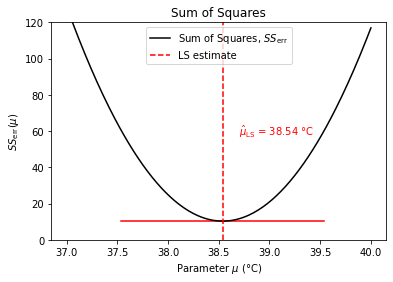

In [14]:
import matplotlib.pyplot as plt

# First, define the SS_err function:
def SS_err(mu, y):
    Y = np.array(y)
    return(np.sum(np.square(Y-mu)));

# make list of mu-values between 37 and 40 oC:
x = np.linspace(37, 40, 201)

# Evaluate the SS_err function for all mu-values:
SS = np.array([SS_err(xi, y) for xi in x])

SS_min = SS_err(mu_LS, y)    # Lowest value of SS.err
x_hor = np.array([mu_LS - 1.0, mu_LS + 1.0])
y_hor = np.repeat(SS_min, 2)

# Make a scatter plot:
plt.plot(x_hor, y_hor, 'r-')
plt.plot(x, SS, 'k', label='Sum of Squares, $SS_{{\\rm err}}$')
plt.title('Sum of Squares')
plt.xlabel('Parameter $\mu$ (\xb0C)')
plt.ylabel('$SS_{{\\rm err}}(\mu)$')
plt.axvline(x = mu_LS, color = 'red', linestyle='--', label='LS estimate')
plt.legend(loc='best')
plt.ylim([0, 120])
plt.text(38.7, 60, '$\hat{\mu}_{{\\rm LS}}$ = '+'{0:.2f} \xb0C'.format(mu_LS), verticalalignment='center', color='red')
plt.show()

**c.** Make a histogram of the dataset $y$, and add a vertical line at the LS estimate of $\mu$.

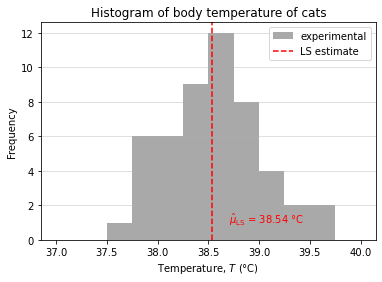

In [15]:
plt.hist(x=y, 
         bins=np.arange(37, 40.25, 0.25), 
         color='darkgrey',alpha=1, rwidth=1, label='experimental')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Temperature, $T$ (\xb0C)')
plt.ylabel('Frequency')
plt.title('Histogram of body temperature of cats')
# make a vertical line:
plt.axvline(x = mu_LS, color = 'red', linestyle='--', label='LS estimate')
plt.text(38.7, 1.2, '$\hat{\mu}_{{\\rm LS}}$ = '+'{0:.2f} \xb0C'.format(mu_LS), verticalalignment='center', color='red')
plt.legend(loc='best')
plt.show()

## Section 1.5 Method of Moments

### Example 1.5.1 - Body temperature of cats (1) - Method of Moments

For the sample of $n=50$ cats, we have:

In [16]:
import numpy as np

y = np.array([39.54, 37.87, 39.02, 38.30, 38.03, 39.27, 38.68, 38.28, 38.39, 38.66,
       39.47, 38.57, 38.93, 38.56, 38.24, 38.91, 38.28, 38.78, 38.50, 38.07, 
       37.75, 38.68, 37.74, 38.78, 37.83, 39.09, 37.93, 37.92, 39.03, 38.92,
       38.72, 39.03, 38.52, 38.97, 38.42, 38.72, 38.77, 38.44, 38.14, 37.86, 
       38.27, 38.63, 38.35, 38.83, 38.10, 38.54, 38.55, 38.32, 39.56, 38.22])

**a.** Make a *normalized* histrogram of the data, i.e., a probability density.

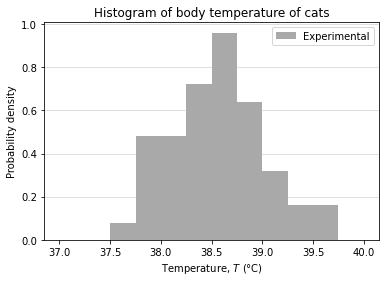

In [17]:
import matplotlib.pyplot as plt

plt.hist(x=y,density=True, 
         bins=np.arange(37, 40.25, 0.25), 
         color='darkgrey',alpha=1, rwidth=1, label='Experimental')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Temperature, $T$ (\xb0C)')
plt.ylabel('Probability density')
plt.title('Histogram of body temperature of cats')
plt.legend(loc='best')
plt.show()

**b.** Evaluate the Method of Moments estimations of $\mu$ and $\sigma^2$ of this dataset $y$.

In [63]:
mu_MM = np.mean(y)
sigma2_MM = np.var(y)   # or: np.mean((y - mu_MM)**2)

print('mu.MM = {:.2f}, sigma2.MM = {:.3f}'.format(mu_MM, sigma2_MM))

mu.MM = 38.50, sigma2.MM = 1.167


**c.** Plot a normal distribution with parameters $\mu$ and $\sigma$ in the normalized histrogram of **a.**

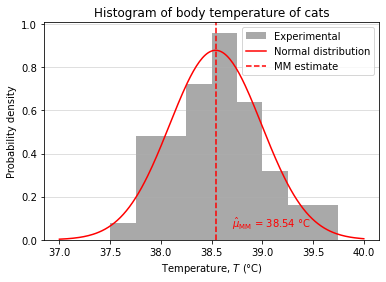

In [19]:
from scipy.stats import norm

x = np.linspace(37, 40, 201)
sigma_MM = np.sqrt(sigma2_MM)
rv = np.array([norm.pdf(xi, loc = mu_MM, scale = sigma_MM) for xi in x])

plt.hist(x=y,density=True,
         bins=np.arange(37, 40.25, 0.25), 
         color='darkgrey',alpha=1, rwidth=1, label='Experimental')
plt.plot(x, rv, 'r', label='Normal distribution')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Temperature, $T$ (\xb0C)')
plt.ylabel('Probability density')
plt.title('Histogram of body temperature of cats')
plt.axvline(x = mu_MM, color='red', linestyle='--', label='MM estimate')
plt.text(38.7, 0.08, '$\hat{\mu}_{{\\rm MM}}$ = '+'{0:.2f} \xb0C'.format(mu_MM), verticalalignment='center', color='red')
plt.legend(loc='best')
plt.show()

## Section 1.6 Maximum Likelihood

The logarithmic function is a monotonic increasing function.

Plot the natural logarithm, $\ln(x)$.

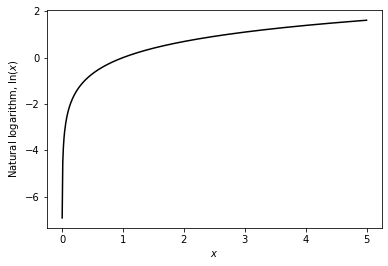

In [20]:
import numpy as np

x = np.linspace(0.001, 5, 501)
y = np.array([np.log(xi) for xi in x])

plt.plot(x, y, 'k-')
plt.xlabel('$x$')
plt.ylabel('Natural logarithm, $\ln(x)$')
plt.show()

### Example 1.6.1 - Likelihood and coin tossing

Suppose we toss a coin; the outcome can be either "head" (${\rm H}$) or "tail" (${\rm T}$). We toss the coin multiple ($=n$) times. We have two hypotheses about the coin:

- H1: The coin is fair, so the probability to get heads is 50%: $p\equiv P⁡({\rm H})=0.50$, so $P⁡({\rm T})=1-0.50$

- H2: The coin is not fair, in fact heads are favored: $p \equiv P⁡({\rm H})=0.70$, so $P⁡({\rm T})=1-0.70$.

Based on the data, we want to choose either hypothesis H1 or H2. We use the likelihood $L$ of the observed data. The likelihood of the data is the chance to observe this specific dataset, assuming that all measurements are independent. Hence, $L=f(y_1 ) \times f(y_2 ) \times f(y_3 ) \times \cdots \times f(y_n )$.


**a.** Suppose we toss $n=5$ times, with result: $4$ times ${\rm H}$ and $1$ time ${\rm T}$, e.g. $y=\{{\rm H},{\rm H},{\rm T},{\rm H},{\rm H}\}$. 

Calculate the likelihood for hypothesis H1 and for hypothesis H2.

In [21]:
import numpy as np

n_H = 4
n_T = 1

# Hypothesis H1:
p_1 = 0.50
L_1 = p_1**n_H * (1-p_1)**n_T

print('Likelihood L.1 = {:.3g}'.format(L_1))

# Hypothesis H2:
p_2 = 0.70
L_2 = p_2**n_H * (1-p_2)**n_T

print('Likelihood L.2 = {:.3g}'.format(L_2))

# Likelihood Ratio:
LR_21 = L_2 / L_1

print('Likelihood Ratio LR.21 = {:.3g}'.format(LR_21))

Likelihood L.1 = 0.0312
Likelihood L.2 = 0.072
Likelihood Ratio LR.21 = 2.3


So, based on these data hypothesis H2 is $2.30$ times more likely than hypothesis H1. This is not so convincing.

**b.** Suppose we toss $n=50$ times, with result: $40$ times ${\rm H}$ and $10$ time ${\rm T}$. 

Calculate the likelihood for hypothesis H1 and for hypothesis H2.

In [22]:
n_H = 40
n_T = 10

# Hypothesis H1:
p_1 = 0.50
L_1 = p_1**n_H * (1-p_1)**n_T

print('Likelihood L.1 = {:.3g}'.format(L_1))

# Hypothesis H2:
p_2 = 0.70
L_2 = p_2**n_H * (1-p_2)**n_T

print('Likelihood L.2 = {:.3g}'.format(L_2))

# Likelihood Ratio:
LR_21 = L_2 / L_1

print('Likelihood Ratio LR.21 = {:.3g}'.format(LR_21))

Likelihood L.1 = 8.88e-16
Likelihood L.2 = 3.76e-12
Likelihood Ratio LR.21 = 4.23e+03


So, based on these data hypothesis H2 is more than 4000 times more likely than hypothesis H1. This is very convincing. 

**c.** Suppose we toss $n=500$ times, with result: $400$ times ${\rm H}$ and $100$ time ${\rm T}$. 

Calculate the likelihood for hypothesis H1 and for hypothesis H2.

In [23]:
n_H = 400
n_T = 100

# Hypothesis H1:
p_1 = 0.50
L_1 = p_1**n_H * (1-p_1)**n_T

print('Likelihood L.1 = {:.3g}'.format(L_1))

# Hypothesis H2:
p_2 = 0.70
L_2 = p_2**n_H * (1-p_2)**n_T

print('Likelihood L.2 = {:.3g}'.format(L_2))

# Likelihood Ratio:
LR_21 = L_2 / L_1

print('Likelihood Ratio LR.21 = {:.3g}'.format(LR_21))

Likelihood L.1 = 3.05e-151
Likelihood L.2 = 5.64e-115
Likelihood Ratio LR.21 = 1.85e+36


So, based on these data hypothesis H2 is extremely more likely than hypothesis H1.

**d.** Suppose we toss $n=5$ times a coin, and obtain $4$ Heads and $1$ Tail. The probability to get Heads (${\rm H}$) is $P({\rm H}) \equiv p$ and the probability to get Tails (${\rm T}$) is $1-p$. Plot the likelihood function $L(p)$ for $0 < p < 1$.

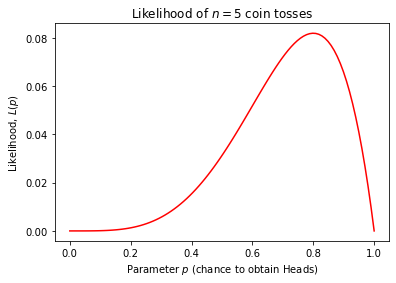

In [24]:
import matplotlib.pyplot as plt

n_H = 4
n_T = 1

p = np.linspace(0, 1, num = 100)

# Likelihood:
L = p**n_H * (1-p)**n_T

plt.plot(p, L, 'r')
plt.xlabel('Parameter $p$ (chance to obtain Heads)')
plt.ylabel('Likelihood, $L(p)$')
plt.title('Likelihood of $n=5$ coin tosses')
plt.show()

The logarithm of the likelihood, $\ln L(p)$, also has a maximum at the same value of $p$.

C:\Users\apma\AppData\Local\Temp\ipykernel_23632\2345611084.py:2: RuntimeWarning: divide by zero encountered in log
  logL = np.log(L)


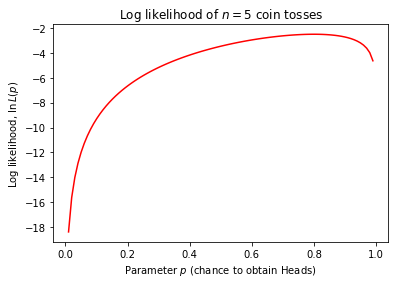

In [25]:
# Log likelihood:
logL = np.log(L)

plt.plot(p, logL, 'r')
plt.xlabel('Parameter $p$ (chance to obtain Heads)')
plt.ylabel('Log likelihood, $\ln L(p)$')
plt.title('Log likelihood of $n=5$ coin tosses')
plt.show()

For the data of case **b.**, 40 heads and 10 tails we obtain:

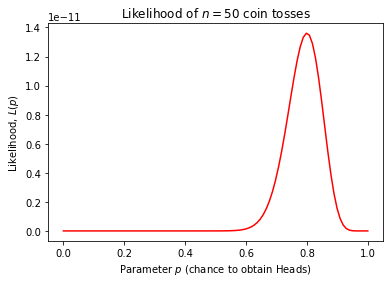

C:\Users\apma\AppData\Local\Temp\ipykernel_23632\1102335681.py:16: RuntimeWarning: divide by zero encountered in log
  logL = np.log(L)


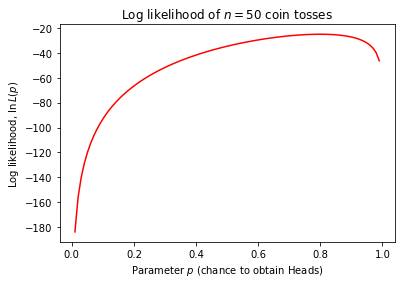

In [26]:
n_H = 40
n_T = 10

p = np.linspace(0, 1, num = 100)

# Likelihood:
L = p**n_H * (1-p)**n_T

plt.plot(p, L, 'r')
plt.xlabel('Parameter $p$ (chance to obtain Heads)')
plt.ylabel('Likelihood, $L(p)$')
plt.title('Likelihood of $n=50$ coin tosses')
plt.show()

# Log likelihood:
logL = np.log(L)

plt.plot(p, logL, 'r')
plt.xlabel('Parameter $p$ (chance to obtain Heads)')
plt.ylabel('Log likelihood, $\ln L(p)$')
plt.title('Log likelihood of $n=50$ coin tosses')
plt.show()

For the data of case **c.**, 400 heads and 100 tails we obtain:

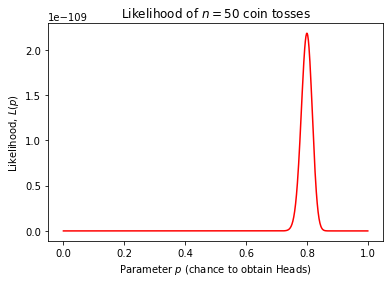

C:\Users\apma\AppData\Local\Temp\ipykernel_23632\2084417543.py:16: RuntimeWarning: divide by zero encountered in log
  logL = np.log(L)


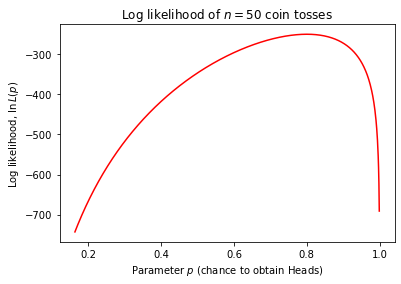

In [27]:
n_H = 400
n_T = 100

p = np.linspace(0, 1, num = 1000)

# Likelihood:
L = p**n_H * (1-p)**n_T

plt.plot(p, L, 'r')
plt.xlabel('Parameter $p$ (chance to obtain Heads)')
plt.ylabel('Likelihood, $L(p)$')
plt.title('Likelihood of $n=50$ coin tosses')
plt.show()

# Log likelihood:
logL = np.log(L)

plt.plot(p, logL, 'r')
plt.xlabel('Parameter $p$ (chance to obtain Heads)')
plt.ylabel('Log likelihood, $\ln L(p)$')
plt.title('Log likelihood of $n=50$ coin tosses')
plt.show()

### Example 1.6.2 - Body temperature of cats (2) - Maximum Likelihood

For the sample of $n=3$ cats we have:

In [28]:
import numpy as np

y = np.array([37.5,38.0,40.0])

**a.** What is for this dataset $y$ the Maximum Likelihood (ML) estimate of $\mu$, i.e., what is ${\bar y}$?

In [29]:
mu_ML = np.mean(y)

print("mu = {:.2f} \xb0C".format(mu_ML))

mu = 38.50 °C


**b.** Plot the log likelihood function $\ln(L)$ as a function of the parameter $\mu$, using the ML estimate ${\hat \sigma}^2 = m_2$.

sigma2.ML =  1.1666666666666667


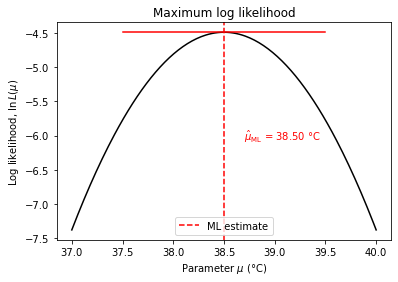

In [30]:
import matplotlib.pyplot as plt
from scipy.stats import norm

sigma2_ML = np.var(y) # OR: np.mean((Y- np.mean(Y))**2)
sigma_ML = np.sqrt(sigma2_ML)
print('sigma2.ML = ',sigma2_ML)

# First, define the ln(L) function:
def logL(mu, y, sigma):
    Y = np.array(y)
    return(np.sum(norm.logpdf(Y, loc=mu, scale=sigma)));

# make list of mu-values between 37 and 40 oC:
x = np.linspace(37, 40, 201)

# Evaluate the SS_err function for all mu-values:
LL = np.array([logL(xi, y, sigma_ML) for xi in x])

LL_max = logL(mu_ML, y, sigma_ML)  # Maximum LL value for plotting
x_hor = np.array([mu_ML - 1.0, mu_ML + 1.0])
y_hor = np.repeat(LL_max, 2)

# Make a scatter plot:
plt.plot(x, LL, 'k')
plt.xlabel('Parameter $\mu$ (\xb0C)')
plt.ylabel('Log likelihood, $\ln L(\mu)$')
plt.title('Maximum log likelihood')
plt.plot(x_hor, y_hor, 'r-')
plt.axvline(x = mu_ML, color = 'red', linestyle='--', label='ML estimate')
plt.text(38.7, -6.0, '$\hat{\mu}_{{\\rm ML}}$ = '+'{0:.2f} \xb0C'.format(mu_ML), verticalalignment='center', color='red')
plt.legend(loc='best')
plt.show()

Also plot the likelihood function itself.

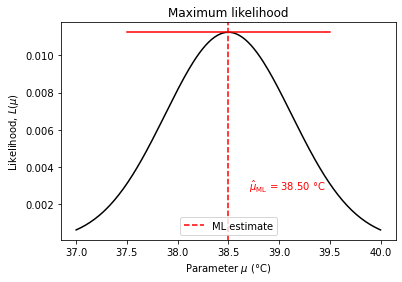

In [31]:
L = np.exp(LL)

L_max = np.exp(logL(mu_ML, y, sigma_ML))  # Maximum L value for plotting
x_hor = np.array([mu_ML - 1.0, mu_ML + 1.0])
y_hor = np.repeat(L_max, 2)

# Make a scatter plot:
plt.plot(x, L, 'k')
plt.xlabel('Parameter $\mu$ (\xb0C)')
plt.ylabel('Likelihood, $L(\mu)$')
plt.title('Maximum likelihood')
plt.plot(x_hor, y_hor, 'r-')
plt.axvline(x = mu_ML, color = 'red', linestyle='--', label='ML estimate')
plt.text(38.7, 0.003, '$\hat{\mu}_{{\\rm ML}}$ = '+'{0:.2f} \xb0C'.format(mu_ML), verticalalignment='center', color='red')
plt.legend(loc='best')
plt.show()

**c.** For a normal distribution, the likelihood function $L(y | \mu, \sigma^2)$ is in fact a *scaled* normal distribution with mean ${\bar y}$ and standard deviation $\sigma/{\sqrt n}$. Make a plot of this *scaled* likelihood function on top of the *normalized* histogram of the data.

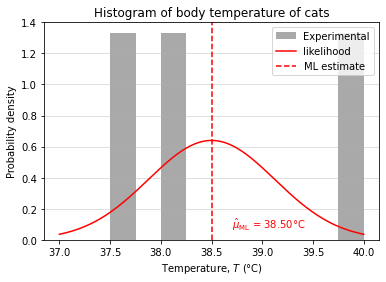

In [32]:
x = np.linspace(37, 40, 201)
mu_L = mu_ML
n = len(y)
sigma_L = sigma_ML/np.sqrt(n)
rv = np.array([norm.pdf(xi, loc = mu_L, scale = sigma_L) for xi in x])

plt.hist(x=y,density=True,
         bins=np.arange(37, 40.25, 0.25), 
         color='darkgrey',alpha=1, rwidth=1, label='Experimental')
plt.plot(x, rv, 'r', label="likelihood")
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Temperature, $T$ (\xb0C)')
plt.ylabel('Probability density')
plt.title('Histogram of body temperature of cats')
plt.axvline(x = mu_ML, color='red', linestyle='--', label='ML estimate')
plt.text(38.7, 0.1, '$\hat{\mu}_{{\\rm ML}}$ = '+'{0:.2f}\xb0C'.format(mu_ML), verticalalignment='center', color='red')
plt.legend(loc='best')
plt.show()

### Example 1.6.3 - Body temperature of cats (3) - Shape of the likelihood function

For a sample of $n=3$ cats, we have:

In [33]:
import numpy as np

y = np.array([37.5,38.0,40.0])

For a normal distribution, the likelihood function $L(y | \mu, \sigma^2)$ is in fact a *scaled* normal distribution with mean ${\bar y}$ and standard deviation $\sigma/{\sqrt n}$. Make a plot of this *scaled* likelihood function on top of the *normalized* histogram of the data.

mu.ML = 38.50 °C, sigma2.ML = 1.1667, n = 3


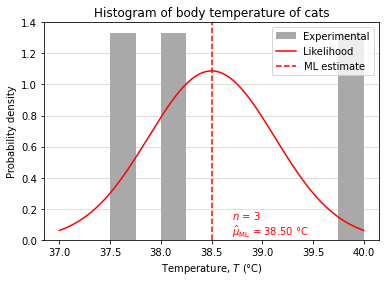

In [34]:
import matplotlib.pyplot as plt
from scipy.stats import norm

mu_ML = np.mean(y)
sigma2_ML = np.var(y)
sigma_ML = np.sqrt(sigma2_ML)
n = len(y)

print("mu.ML = {:.2f} \xb0C, sigma2.ML = {:.4f}, n = {:d}".format(mu_ML, sigma2_ML, n))

scaling_L = 1.7     # Arbitrary scaling factor of Likelihood function L for plotting
x = np.linspace(37, 40, 201)
mu_L = mu_ML
sigma_L = sigma_ML/np.sqrt(n)
f_L = scaling_L * np.array([norm.pdf(xi, loc = mu_L, scale = sigma_L) for xi in x])

# Make plot:
plt.hist(x=y,density=True,
         bins=np.arange(37, 40.25, 0.25), 
         color='darkgrey',alpha=1, rwidth=1, label='Experimental')
plt.plot(x, f_L, 'r', label="Likelihood")
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Temperature, $T$ (\xb0C)')
plt.ylabel('Probability density')
plt.title('Histogram of body temperature of cats')
plt.axvline(x = mu_ML, color='red', linestyle='--', label='ML estimate')
plt.text(38.7, 0.1, '$n$ = {:d}\n'.format(n)+'$\hat{\mu}_{{\\rm ML}}$ = '+'{0:.2f} \xb0C'.format(mu_ML), verticalalignment='center', color='red')
plt.legend(loc='best')
plt.show()

For a sample of $n=12$ cats, we have:

In [35]:
y = np.array([39.54, 38.03, 38.39, 38.93, 38.28, 
       37.75, 37.83, 39.03, 38.52, 38.77,  
       38.27, 38.10])

mu.ML = 38.45 °C, sigma2.ML = 0.2584, n = 12


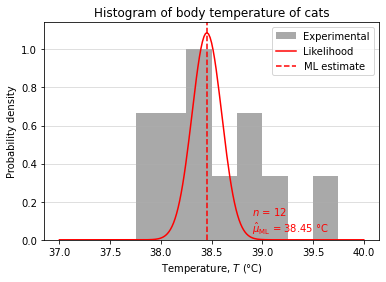

In [36]:
mu_ML = np.mean(y)
sigma2_ML = np.var(y)
sigma_ML = np.sqrt(sigma2_ML)
n = len(y)

print("mu.ML = {:.2f} \xb0C, sigma2.ML = {:.4f}, n = {:d}".format(mu_ML, sigma2_ML, n))

scaling_L = 0.4     # Arbitrary scaling factor of Likelihood function L for plotting
x = np.linspace(37, 40, 201)
mu_L = mu_ML
sigma_L = sigma_ML/np.sqrt(n)
f_L = scaling_L * np.array([norm.pdf(xi, loc = mu_L, scale = sigma_L) for xi in x])

plt.hist(x=y,density=True,
         bins=np.arange(37, 40.25, 0.25), 
         color='darkgrey',alpha=1, rwidth=1, label='Experimental')
plt.plot(x, f_L, 'r', label="Likelihood")
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Temperature, $T$ (\xb0C)')
plt.ylabel('Probability density')
plt.title('Histogram of body temperature of cats')
plt.axvline(x = mu_ML, color='red', linestyle='--', label='ML estimate')
plt.text(38.9, 0.1, '$n$ = {:d}\n'.format(n)+'$\hat{\mu}_{{\\rm ML}}$ = '+'{0:.2f} \xb0C'.format(mu_ML), verticalalignment='center', color='red')
plt.legend(loc='best')
plt.show()

For the sample of $n=50$ cats, we have:

In [37]:
y = np.array([39.54, 37.87, 39.02, 38.30, 38.03, 39.27, 38.68, 38.28, 38.39, 38.66,
       39.47, 38.57, 38.93, 38.56, 38.24, 38.91, 38.28, 38.78, 38.50, 38.07, 
       37.75, 38.68, 37.74, 38.78, 37.83, 39.09, 37.93, 37.92, 39.03, 38.92,
       38.72, 39.03, 38.52, 38.97, 38.42, 38.72, 38.77, 38.44, 38.14, 37.86, 
       38.27, 38.63, 38.35, 38.83, 38.10, 38.54, 38.55, 38.32, 39.56, 38.22])

mu.ML = 38.54 °C, sigma2.ML = 0.2062, n = 50


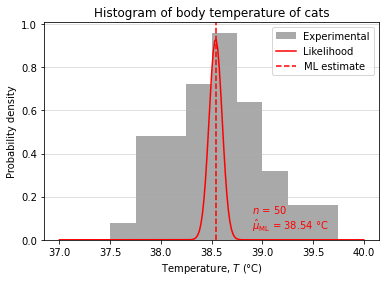

In [38]:
mu_ML = np.mean(y)
sigma2_ML = np.var(y)
sigma_ML = np.sqrt(sigma2_ML)
n = len(y)

print("mu.ML = {:.2f} \xb0C, sigma2.ML = {:.4f}, n = {:d}".format(mu_ML, sigma2_ML, n))

scaling_L = 0.15     # Arbitrary scaling factor of Likelihood function L for plotting
x = np.linspace(37, 40, 201)
mu_L = mu_ML
sigma_L = sigma_ML/np.sqrt(n)
f_L = scaling_L * np.array([norm.pdf(xi, loc = mu_L, scale = sigma_L) for xi in x])

plt.hist(x=y,density=True,
         bins=np.arange(37, 40.25, 0.25), 
         color='darkgrey',alpha=1, rwidth=1, label='Experimental')
plt.plot(x, f_L, 'r', label="Likelihood")
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Temperature, $T$ (\xb0C)')
plt.ylabel('Probability density')
plt.title('Histogram of body temperature of cats')
plt.axvline(x = mu_ML, color='red', linestyle='--', label='ML estimate')
plt.text(38.9, 0.1, '$n$ = {:d}\n'.format(n)+'$\hat{\mu}_{{\\rm ML}}$ = '+'{0:.2f} \xb0C'.format(mu_ML), verticalalignment='center', color='red')
plt.legend(loc='best')
plt.show()

**a.** What is for this dataset $y$ the Maximum Likelihood (ML) estimate of $\mu$, i.e., what is ${\bar y}$?

In [39]:
import numpy as np

Y = np.array(y)
mu_ML = np.mean(Y)

print("mu = {:.2f}\xb0C".format(mu_ML))

mu = 38.54°C


**b.** Plot the log likelihood function $\ln(L)$ as a function of the parameter $\mu$, using the ML estimate ${\hat \sigma}^2 = m_2$.

sigma2.ML =  0.20623584000000014


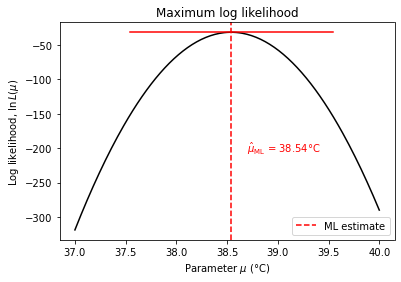

In [40]:
import matplotlib.pyplot as plt
from scipy.stats import norm

Y = np.array(y)
sigma2_ML = np.mean((Y- np.mean(Y))**2)
sigma_ML = np.sqrt(sigma2_ML)
print('sigma2.ML = ',sigma2_ML)

# First, define the ln(L) function:
def logL(mu, y, sigma):
    Y = np.array(y)
    return(np.sum(norm.logpdf(Y, loc=mu, scale=sigma)));

# make list of mu-values between 37 and 40 oC:
x = np.linspace(37, 40, 201)

# Evaluate the SS_err function for all mu-values:
LL = np.array([logL(xi, y, sigma_ML) for xi in x])

LL_max = logL(mu_ML, y, sigma_ML)  # Maximum LL value for plotting
x_hor = np.array([mu_ML - 1.0, mu_ML + 1.0])
y_hor = np.repeat(LL_max, 2)

# Make a scatter plot:
plt.plot(x, LL, 'k')
plt.xlabel('Parameter $\mu$ (\xb0C)')
plt.ylabel('Log likelihood, $\ln L(\mu)$')
plt.title('Maximum log likelihood')
plt.plot(x_hor, y_hor, 'r-')
plt.axvline(x = mu_ML, color = 'red', linestyle='--', label='ML estimate')
plt.text(38.7, -200.0, '$\hat{\mu}_{{\\rm ML}}$ = '+'{0:.2f}\xb0C'.format(mu_ML), verticalalignment='center', color='red')
plt.legend(loc='best')
plt.show()

**c.** For a normal distribution, the likelihood function $L(\mu)=f(\{y\} | \mu, \sigma^2)$ is in fact a *scaled* normal distribution with mean ${\bar y}$ and standard deviation $\sigma/{\sqrt n}$. Make a plot of this *scaled* likelihood function on top of the *normalized* histogram of the data.

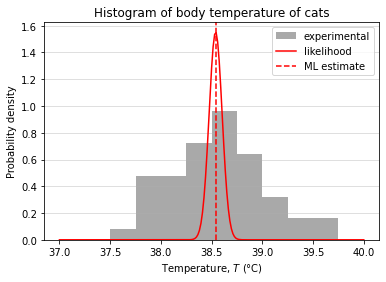

In [41]:
# Define an arbitrary scaling factor for the likelihood function:
scaling_L = 0.25
n, bins, patches = plt.hist(x=y,density=True,
                            bins=np.arange(37, 40.25, 0.25), 
                            color='darkgrey',alpha=1, rwidth=1, label='experimental')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Temperature, $T$ (\xb0C)')
plt.ylabel('Probability density')
plt.title('Histogram of body temperature of cats')
x = np.linspace(37, 40, 201)
mu_L = mu_ML
n = len(y)
sigma_L = sigma_ML/np.sqrt(n)
rv = np.array([scaling_L*norm.pdf(xi, loc = mu_L, scale = sigma_L) for xi in x])
h = plt.plot(x, rv, 'r', label='likelihood')
plt.axvline(x = mu_ML, color='red', linestyle='--', label='ML estimate')
plt.legend(loc='best')
plt.show()

## Section 1.7 Bayesian estimation

### Example 1.7.1 - Body temperature of cats (4) - Bayesian estimation

For $n=3$ cats, we have the following measurements:

In [42]:
import numpy as np

y = np.array([39.54, 37.87, 39.02])

Suppose we also **know** the standard deviation: $\sigma = 0.85 \, ^\circ$C.

In [43]:
sigma = 0.85

sigma2 = sigma**2

**a.** Determine for this dataset $y$ the ML estimates of $\mu$ and $\sigma^2$, as well as the unbiased estimate of the variance, $s^2$.

In [44]:
import statistics as stat

mu_ML = np.mean(y)
sigma2_ML = np.var(y)
s2 = np.var(y, ddof=1)

print('mu.ML = {:.2f} \xb0C, sigma2.ML = {:.4f}, s2 = {:.4f}'.format(mu_ML, sigma2_ML, s2))

sigma_ML = np.sqrt(sigma2_ML)
s = np.sqrt(s2)
n = len(y)

print('sigma.ML = {:.3f} \xb0C, s = {:.3f} \xb0C, n = {:d}'.format(sigma_ML, s, n))

mu.ML = 38.81 °C, sigma2.ML = 0.4869, s2 = 0.7303
sigma.ML = 0.698 °C, s = 0.855 °C, n = 3


Note: we see that the sample standard deviation $s = 0.855\,^\circ$C resembles the theoretical (and known!) value of the standard deviation $\sigma = 0.85 \,^\circ$C.

**b.** Plot the *scaled* likelihood function $L(\mu)$ (as a probability density) as a function of $\mu$ from 37 to 40 $^\circ$C.

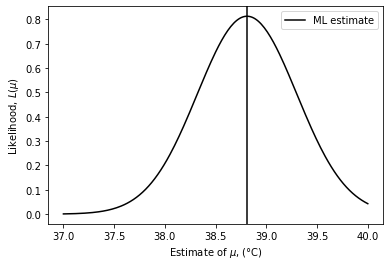

In [45]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# make list of mu-values between 37 and 40 oC:
x = np.linspace(37, 40, 201)

# Evaluate the likelihood function for all mu-values:
mu_L = mu_ML
sigma_L = sigma/np.sqrt(n)
L = np.array([norm.pdf(xi, loc=mu_L, scale=sigma_L) for xi in x])

# Make a scatter plot:
plt.plot(x, L, 'k')
plt.xlabel('Estimate of $\mu$, (\xb0C)')
plt.ylabel('Likelihood, $L(\mu)$')
plt.axvline(x = mu_ML, color = 'k', linestyle='-', label='ML estimate')
plt.legend(loc='best')
plt.show()

Prior kowledge: body temperature of healthy cats is usually between 37.8 and 39.2 $^\circ$C.

**c.** Based on this prior knowledge, determine the mean $\mu_0$ and standard deviation $\sigma_0$ of a prior normal distribution.

In [46]:
import statistics as stat

lower = 37.8
upper = 39.2

# mu.0 is the mean of lower and upper
mu_0 = stat.mean([lower, upper])

# assuming that the range between lower and upper corresponds to 95% of the data = 4 standard deviations, 
# we get delta.0 = (upper - lower)/4
delta_0 = (upper - lower)/4
delta2_0 = delta_0**2

print('mu.0 = {:.2f} \xb0C; delta.0 = {:.3f} \xb0C'.format(mu_0, delta_0))

mu.0 = 38.50 °C; delta.0 = 0.350 °C


**d.** Plot the *prior* distribution $\pi(\mu)$ as a function of $\mu$ from 37 to 40 $^\circ$C, together with the (scaled) likelihood function (see **b.**).

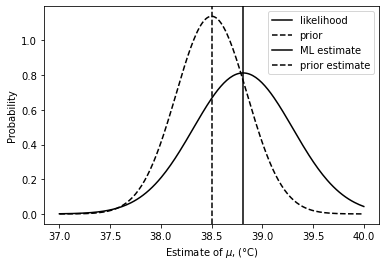

In [47]:
# make list of mu-values between 37 and 40 oC:
x = np.linspace(37, 40, 201)

# Evaluate the likelihood function and prior distribution for all mu-values:
mu_L = mu_ML
sigma_L = sigma/np.sqrt(n)
L = np.array([norm.pdf(xi, loc=mu_L, scale=sigma_L) for xi in x])
Pi = np.array([norm.pdf(xi, loc=mu_0, scale=delta_0) for xi in x])

# Make a scatter plot:
plt.plot(x, L, 'k', label='likelihood')
plt.plot(x, Pi, 'k--', label='prior')
plt.xlabel('Estimate of $\mu$, (\xb0C)')
plt.ylabel('Probability')
plt.axvline(x = mu_ML, color = 'k', linestyle='-', label='ML estimate')
plt.axvline(x = mu_0, color = 'k', linestyle='--', label='prior estimate')
plt.legend(loc='best')
plt.show()

Assuming sample data from a normal distribution $N(\mu, \sigma^2)$, and using Bayes rule with a normal prior distribution $N(\mu_0, \delta_0^2)$ for $\mu$, the *posterior* distribution of $\mu$ is also normal with mean

\begin{equation}
\mu_n = \frac{1/\delta_0^2}{1/\delta_0^2+n/\sigma^2}\cdot \mu_0 + 
\frac{n/s^2}{1/\delta_0^2+n/\sigma^2}\cdot {\bar y}
\end{equation}

and variance

\begin{equation}
\sigma_n^2 = \frac{1}{1/\delta_0^2+n/\sigma^2}
\end{equation}

Hence, for the dataset $y$ the Bayesian estimate $ {\hat \mu}_{\rm B}$ for $\mu$ is the average of the posterior distribution,

\begin{equation}
{\hat \mu}_{\rm B} = \mu_n
\end{equation}

**e.** Calculate the posterior parameters $\mu_n$ and $\sigma_n$.

In [48]:
n = len(y)
mu_n = (1/delta2_0)/(1/delta2_0 + n/sigma2)*mu_0 + (n/sigma2)/(1/delta2_0 + n/sigma2)*mu_ML
sigma2_n = 1/(1/delta2_0 + n/sigma2)
sigma_n = np.sqrt(sigma2_n)

print('mu.0   = {:.2f} \xb0C; \t\tsigma.0   = {:.3f} \xb0C'.format(mu_0, delta_0))
print('mu.ML  = {:.2f} \xb0C; \t\tsigma.ML  = {:.3f} \xb0C'.format(mu_ML, sigma_ML))
print('mu.n   = {:.2f} \xb0C; \t\tsigma.n   = {:.3f} \xb0C'.format(mu_n, sigma_n))

mu.0   = 38.50 °C; 		sigma.0   = 0.350 °C
mu.ML  = 38.81 °C; 		sigma.ML  = 0.698 °C
mu.n   = 38.60 °C; 		sigma.n   = 0.285 °C


**f.** Plot *posterior* distribution $f(\mu)$ as a function of $\mu$ from 37 to 40 $^\circ$C, together with the (scaled) *likelihood* function (see **b.**) and the *prior* distribution $\pi(\mu)$ (see **d.**).

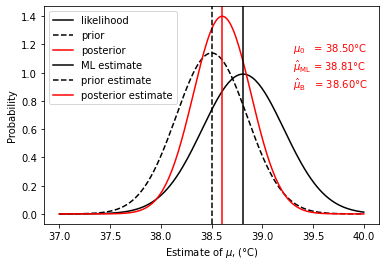

In [49]:
# make list of mu-values between 37 and 40 oC:
x = np.linspace(37, 40, 201)

# Evaluate the likelihood function and prior and posterior distributions for all mu-values:
mu_L = mu_ML
sigma_L = sigma_ML/np.sqrt(n)
L = np.array([norm.pdf(xi, loc=mu_ML, scale=sigma_L) for xi in x])
Pi = np.array([norm.pdf(xi, loc=mu_0, scale=delta_0) for xi in x])
Po = np.array([norm.pdf(xi, loc=mu_n, scale=sigma_n) for xi in x])

# Make a scatter plot:
plt.plot(x, L, 'k', label='likelihood')
plt.plot(x, Pi, 'k--', label='prior')
plt.plot(x, Po, 'r-', label='posterior')
plt.xlabel('Estimate of $\mu$, (\xb0C)')
plt.ylabel('Probability')
plt.axvline(x = mu_ML, color = 'k', linestyle='-', label='ML estimate')
plt.axvline(x = mu_0, color = 'k', linestyle='--', label='prior estimate')
plt.axvline(x = mu_n, color = 'r', linestyle='-', label='posterior estimate')
plt.text(39.3, 1.0, '$\mu_0$   = '+'{0:.2f}\xb0C\n'.format(mu_0) + 
         '$\hat{\mu}_{{\\rm ML }}$ = '+'{0:.2f}\xb0C\n'.format(mu_ML) +
         '$\hat{\mu}_{{\\rm B}}$   = '+'{0:.2f}\xb0C\n'.format(mu_n), verticalalignment='center', color='red')
plt.legend(loc='best')
plt.show()

## Section 1.8 Rubust estimation

### Example 1.8.1 - Body temperature of cats (5) – robust estimation

Suppose we have a dataset with an odd ($n=5$) number of measurements of the body temperature $y$ of cats (in $^\circ$C):

In [50]:
import numpy as np

y = np.array([37.42,39.64,38.57,37.98,39.03])

print('Dataset: ',y)

Dataset:  [37.42 39.64 38.57 37.98 39.03]


**a.** Determine for this dataset the MM/ML estimate of $\mu$.

In [51]:
mu_ML = np.mean(y)

print('mu.ML = {:.2f} \xb0C'.format(mu_ML))

mu.ML = 38.53 °C


**b.** Determine for this dataset the robust estimate of $\mu$, i.e., the median ${\tilde y}$.

In [64]:
mu_R = np.median(y)

print('mu.R = {:.2f} \xb0C'.format(mu_R))

y_sort = np.sort(y)

print('Sorted data: ',y_sort)

mu.R = 38.00 °C
Sorted data:  [37.5 38.  40. ]


**c.** Make a histogram of these data, and indicate with vertical lines the positions of the ML and the robust estimates of $\mu$.

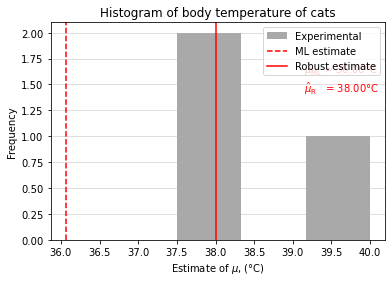

In [65]:
import matplotlib.pyplot as plt

plt.hist(x=y,
         bins='auto', 
         color='darkgrey',alpha=1, rwidth=1, label='Experimental')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Estimate of $\mu$, (\xb0C)')
plt.ylabel('Frequency')
plt.title('Histogram of body temperature of cats')
# make a vertical line:
plt.axvline(x = mu_ML, color = "red", linestyle='--', label='ML estimate')
plt.axvline(x = mu_R, color = "red", linestyle='-', label='Robust estimate')
plt.text(39.15, 1.5, 
         '$\hat{\mu}_{{\\rm ML }}$ = '+'{0:.2f}\xb0C\n'.format(mu_ML) +
         '$\hat{\mu}_{{\\rm R}}$   = '+'{0:.2f}\xb0C\n'.format(mu_R), verticalalignment='center', color='red')
plt.legend(loc='best')
plt.show()

Suppose we have a dataset with an even ($n=6$) number of measurements of the body temperature $y$ of cats (in $^\circ$C):

In [66]:
y = np.array([37.42,39.64,38.57,37.98,39.03,38.33])
print('Dataset: ',y)

Dataset:  [37.42 39.64 38.57 37.98 39.03 38.33]


**d.** Determine for this dataset $y$ the MM/ML and robust estimates of $\mu$. 

In [67]:
mu_ML = np.mean(y)
mu_R = np.median(y)

print('mu.ML = {:.2f} \xb0C; mu.R = {:.2f} \xb0C'.format(mu_ML, mu_R))

mu.ML = 38.49 °C; mu.R = 38.45 °C


### Example 1.8.2 -  Body temperature of cats (6) – robust versus MM/ML estimation

Suppose we have the following dataset of body temperatures $y$ of $n=5$ "healthy" cats (in $^\circ$C), but one of these five cats may in fact not be too healthy:

In [68]:
import numpy as np

y = np.array([37.42,39.64,38.57,25.66,39.03])
print('Dataset: ',y)

Dataset:  [37.42 39.64 38.57 25.66 39.03]


**a.** Determine for this dataset $y$ the MM/ML and robust estimates of $\mu$. 

In [69]:
mu_ML = np.mean(y)
mu_R = np.median(y)

print('mu.ML = {:.2f} \xb0C; mu.R = {:.2f} \xb0C'.format(mu_ML, mu_R))

mu.ML = 36.06 °C; mu.R = 38.57 °C


**b.** Make a histogram of these data, and indicate with vertical lines the positions of the ML and the robust estimates of $\mu$.

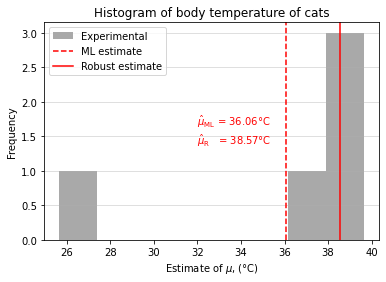

In [70]:
import matplotlib.pyplot as plt

plt.hist(x=y, 
         bins='auto', 
         color='darkgrey',alpha=1, rwidth=1, label='Experimental')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Estimate of $\mu$, (\xb0C)')
plt.ylabel('Frequency')
plt.title('Histogram of body temperature of cats')
# make a vertical line:
plt.axvline(x = mu_ML, color = "red", linestyle='--', label='ML estimate')
plt.axvline(x = mu_R, color = "red", linestyle='-', label='Robust estimate')
plt.text(32, 1.5, 
         '$\hat{\mu}_{{\\rm ML }}$ = '+'{0:.2f}\xb0C\n'.format(mu_ML) +
         '$\hat{\mu}_{{\\rm R}}$   = '+'{0:.2f}\xb0C\n'.format(mu_R), verticalalignment='center', color='red')
plt.legend(loc='best')
plt.show()

**c.** Why is there such a large difference between both estimates?